**Case Study: Forecasting Sales for Fast-Moving Consumer Electronics**

**Introduction:** ElectroTech Innovations, founded in 2010 in Toronto, Canada, has grown into a global brand known for affordable, high-performance gadgets, including smartphones, smartwatches, and AI-powered smart home systems. The company stands out through rapid innovation, an agile supply chain, and a strong focus on customer-centric design, enabling it to consistently outperform competitors.

**Project Overview:** Consumer electronics sales forecasting leverages historical data, trends, and market factors to accurately predict future sales essential in a fast-paced, innovation-driven industry. It supports:

a. Strategic Planning: Informs product development and market entry.

b. Inventory Management: Balances stock levels with demand.

c. Innovation Cycle: Enables fast product launches and market responsiveness

**Essence of Sales Forecasting:** Accurate forecasting helps companies meet demand efficiently using AI-driven insights. It is also for:

a. Inventory Optimization: Lowers storage costs and prevents stockouts.

b. Revenue Growth: Maximizes sales by meeting full market demand.

c. Customer Experience: Keeps popular products consistently available.

d. Operational Efficiency: Improves supply chain planning and coordination.

e. Competitive Edge: Enables timely product launches to stay ahead of trends.

**Project Objectives**

This project aims to:

a. Develop and implement a data-driven forecasting system to solve current business problems. 

a. Use historical trends and seasonality to build better prediction models.

b. Align supply chain, sales, and marketing for smoother operations.

c. Keep inventory levels well-balanced to reduce stock discrepancies.

d. Ensure product availability during high demand periods to improve customer satisfaction

e. Prevent financial losses from poor inventory planning.

f. Apply ML techniques to improve demand forecasting accuracy.

**Tech Stack:** Python, Pandas, NumPy, Matplotlib, ARIMA, Random Forest, Streamlit, Docker



**Project Scope:**

a. Data Collection: Gather historical sales, promotions, customer behavior, and market data.

b. Data Preprocessing: Clean, merge, format, handle missing data, and normalize.

c. Exploratory Data Analysis: Discover trends, seasonality, correlations, and visualize insights.

d. Model Building & Forecasting: Apply ARIMA and Exponential Smoothing; assess model accuracy.

e. Model Evaluation: Test on new data, tune hyperparameters, and choose the best model.

f. Deployment & Visualization: Use Streamlit for dashboards and Docker for deployment.


In [4]:
# Import Libraries

import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


In [5]:
# Load the datasets

data= pd.read_csv(r'C:\Users\USER\Desktop\Projects\Data Science\Regression\Forecasting Sales for Fast-Moving Consumer Electronic\Dataset\ElectroTech Forecasting Data - ElectroTech Forecasting Data.csv')

data.head()


,Product_ID,Category,Price,Date,Season,Market_Trend_Index,Competitor_Activity_Score,Consumer_Confidence_Index,Product_Specification_1,Product_Specification_2,Sales_Volume
0,1103,Laptop,105.32,2009-01-01,Winter,-1.859160,0.546694,84.680465,Spec_C,Long-Battery-Life,49
1,1436,Tablet,145.55,2009-01-01,Winter,-0.345587,0.940428,42.919288,Spec_C,Lightweight,69
2,1271,Smartphone,97.82,2009-01-01,Winter,-0.384738,0.751155,55.191268,Spec_B,Lightweight,50
3,1107,Laptop,64.00,2009-01-01,Winter,0.716763,0.125939,88.746454,Spec_B,High-Resolution,28
4,1072,Tablet,67.83,2009-01-01,Winter,-0.242074,-0.412932,67.947536,Spec_A,Long-Battery-Life,81


**Check for the inconsistencies**

In [6]:
list_data = [
    ("data", data)
]

for name, data in list_data:
    print(name)
    print(f"Missing %: {round(data.isnull().mean() * 100, 2)}\n")
    
    print("Duplicated rows:", data.duplicated().sum())
    
    print("\nNumerical Summary:")
    print(data.describe())
    
    print("\nCategorical Summary:")
    print(data.describe(include=["O", "category"]))

    print("\nInfo:")
    print(data.info())
    
    print("*" * 100)


data
Missing %: Product_ID                   0.0
Category                     0.0
Price                        0.0
Date                         0.0
Season                       0.0
Market_Trend_Index           0.0
Competitor_Activity_Score    0.0
Consumer_Confidence_Index    0.0
Product_Specification_1      0.0
Product_Specification_2      0.0
Sales_Volume                 0.0
dtype: float64

Duplicated rows: 0

Numerical Summary:
          Product_ID          Price  Market_Trend_Index  \
count  136193.000000  136193.000000       136193.000000   
mean     1347.703384     106.812513           -0.000277   
std       200.341518      36.419229            1.009105   
min      1001.000000      40.510000           -4.067055   
25%      1174.000000      75.560000           -0.683015   
50%      1348.000000     104.710000            0.001093   
75%      1522.000000     138.310000            0.680506   
max      1694.000000     181.800000            4.728391   

       Competitor_Activity_Score  

**Analysis**

a. Data Quality: The data quality is excellent with no missing or duplicate values.

b. Data types: The dataset contains 136,193 entries across 11 columns with six numerical ( Price, Market_Trend_Index, Competitor_Activity_Score, Consumer_Confidence_Index, Sales_Volume, Product_ID) and five categorical ( Category, Date, Season, Product_Specification_1, Product_Specification_2). Date is an object type that requires conversion to datetime for time-based analysis.

c.  Distribution: Price (from $40.51 to $181.80) and sales (from 6 to 306 units) show reasonable spread; while some features such as Market_Trend_Index and Competitor_Activity_Score appear normalized with a mean near 0 and standard deviation ≈ 1 (good for modeling).

d. Categorical Balance: Some dominant categories/specs exist e.g., Tablet accounts for ~25% of the category records, Spec_C appears in ~33% of Product_Specification_1 records, and Lightweight is the top spec of Product_Specification_2 with ~45,599 cases. This dominance suggests a skewed distribution which might require balancing for modeling and to reduce bias.

e. Date: Date has 4382 unique daily granularity of approximately 12years wich are useful for modeling long term sales trends, detect cyclical patterns (e.g., yearly, monthly) and perform seasonal decomposition or lag-based modeling

f. Season: There are 4 unique seasons, with bias representation peak during Spring having the most frequent (34,642 entries). Seasonality likely plays a role in sales volume and could be useful for seasonal promotions, demand forecasting, or inventory planning. 

g. Sales Influencers: The factors addecting sales likely include the price, season, confidence index, and overall market trends. These patterns suggest that the data is well-suited for building a predictive model (like regression or time-series forecasting) to estimate future sales.

Dataset: data
Column: Product_ID, Outliers: 0
--------------------------------------------------
Column: Price, Outliers: 0
--------------------------------------------------
Column: Market_Trend_Index, Outliers: 344
--------------------------------------------------
Column: Competitor_Activity_Score, Outliers: 360
--------------------------------------------------
Column: Consumer_Confidence_Index, Outliers: 0
--------------------------------------------------
Column: Sales_Volume, Outliers: 73
--------------------------------------------------
__________________________________________________


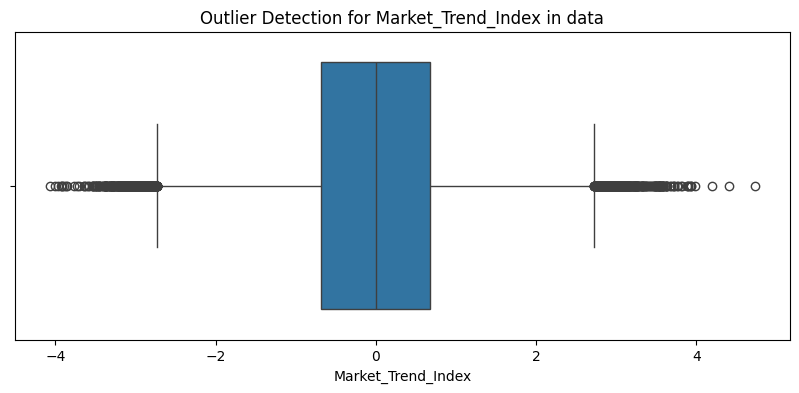

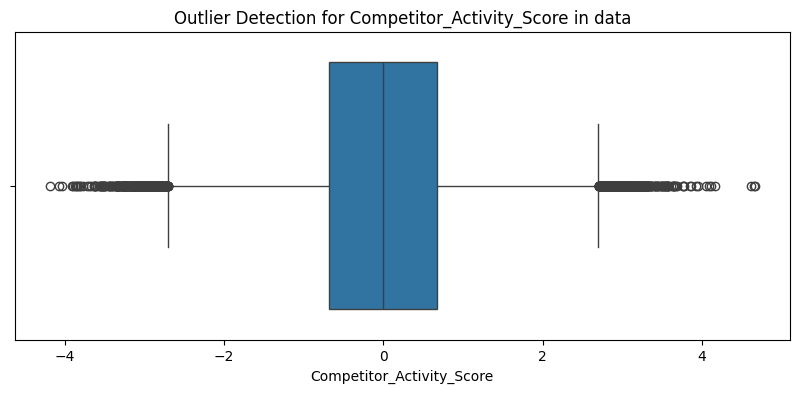

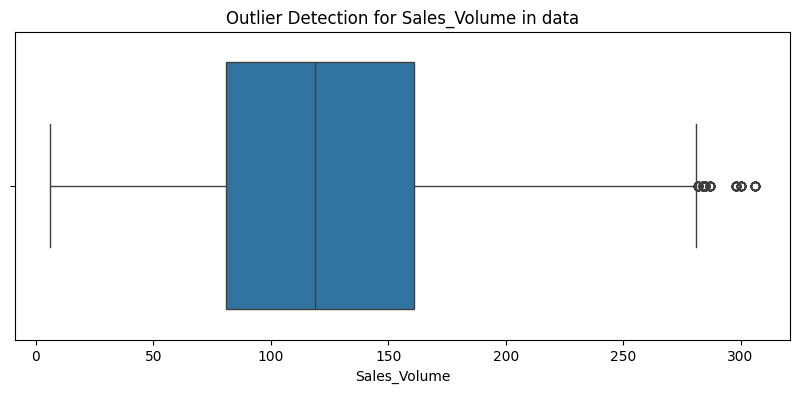

In [7]:
# Outlier Detection and Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through each dataset in list_data
for name, data in list_data:
    print(f"Dataset: {name}")
    
    # Create a list to hold columns with outliers
    outlier_features = []

    # Loop through numeric columns
    for col in data.select_dtypes(include='number').columns:
        mean = data[col].mean()
        std = data[col].std()

        # Z-score based threshold
        lower = mean - (3 * std)
        upper = mean + (3 * std)

        # Detect outliers
        outliers = data[(data[col] < lower) | (data[col] > upper)]

        # Print summary
        print(f"Column: {col}, Outliers: {len(outliers)}")

        # If outliers found, add to list for boxplot
        if len(outliers) > 0:
            outlier_features.append(col)

        print('-' * 50)

    print('_' * 50)

    # Visualize outlier columns using boxplots
    for col in outlier_features:
        plt.figure(figsize=(10, 4))
        sns.boxplot(x=data[col])
        plt.title(f'Outlier Detection for {col} in {name}')
        plt.show()


**Outlier Analysis Summary**

a. No outliers detected in Product_ID, Price, Consumer_Confidence_Index, 

b. Outliers detected in Market_Trend_Index(344 values), Competitor_Activity_Score(360 values), and Sales_Volume(73 
values). Market and Competitor metrics outlier presence may possibly be due to extreme market fluctuations while that of Sales_Volume may represent promotional spikes or unusual demand.

**Handling outlier with Winsorization**

In [8]:
def cap_outliers(df, col, lower_quantile=0.01, upper_quantile=0.99):
    lower = data[col].quantile(lower_quantile)
    upper = data[col].quantile(upper_quantile)
    data[col] = data[col].clip(lower, upper)
    return data

Extreme outliers can distort average-based metrics like mean sales volume, price effects, or promo impacts. Hence, capping at 1st and 99th percentiles keeps the focus on typical customer behavior and not rare anomalies. 1st and 99th percentiles is a data-cleaning strategy that strike a balance by keeping 98% of data untouched while controlling extremes. It also aligns well with the goal of extracting meaningful insights from customer behavior and sales patterns.

In [9]:
for col in ['Market_Trend_Index', 'Competitor_Activity_Score', 'Sales_Volume']:
    data = cap_outliers(data, col)


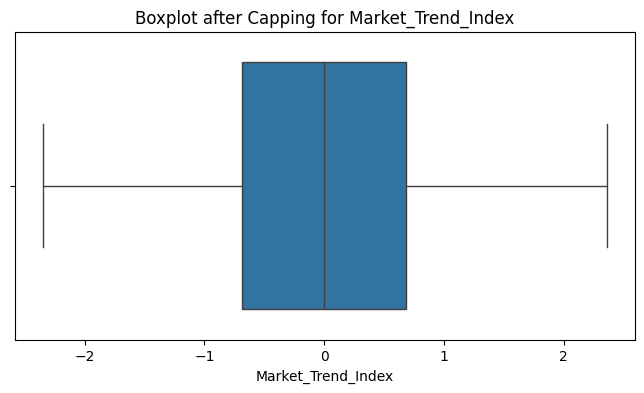

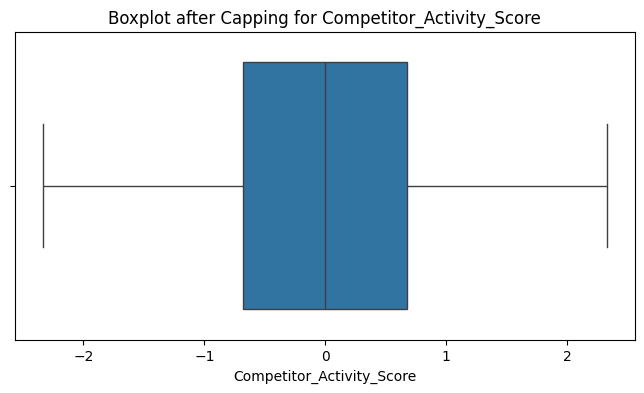

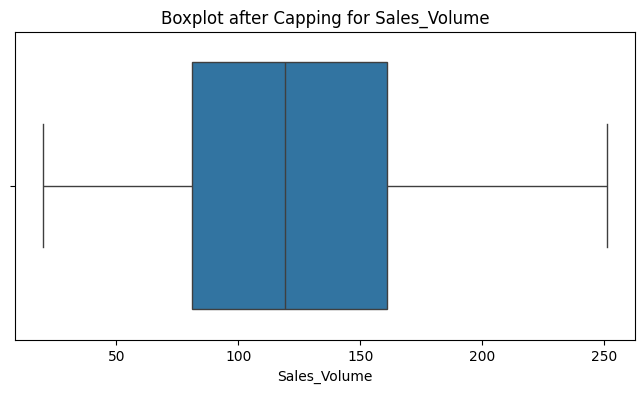

In [10]:
# Visualize the columns after capping outliers

for col in ['Market_Trend_Index', 'Competitor_Activity_Score', 'Sales_Volume']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot after Capping for {col}')
    plt.show()


**Analysis of Boxplot after Capping**

The boxplot for Market_Trend_Index, and Competitor_Activity_Score after capping shows no visible outliers beyond the whiskers. The values are now within the tight, centred range and the distribution appears symmetric and cleaned. This shows the outlier is successfully capped.

**Convert Date to Datetime**

In [11]:
# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])


**Categorical Columns Value Counts**

In [12]:
# Value counts for categorical columns
for name, data in list_data:
    for col in data.select_dtypes(include=['object', 'category']).columns.to_list():
        print(data[col].value_counts())
        print('-' * 50)
    

Category
Tablet         34370
Accessories    34041
Smartphone     33980
Laptop         33802
Name: count, dtype: int64
--------------------------------------------------
Season
Spring    34642
Summer    34159
Fall      33743
Winter    33649
Name: count, dtype: int64
--------------------------------------------------
Product_Specification_1
Spec_C    45652
Spec_B    45569
Spec_A    44972
Name: count, dtype: int64
--------------------------------------------------
Product_Specification_2
Lightweight          45599
Long-Battery-Life    45321
High-Resolution      45273
Name: count, dtype: int64
--------------------------------------------------


**Analysis of Categorical Columns Value counts**

No strong imbalance in the categorical columns that could bias models. This is also confirmed in the plots below

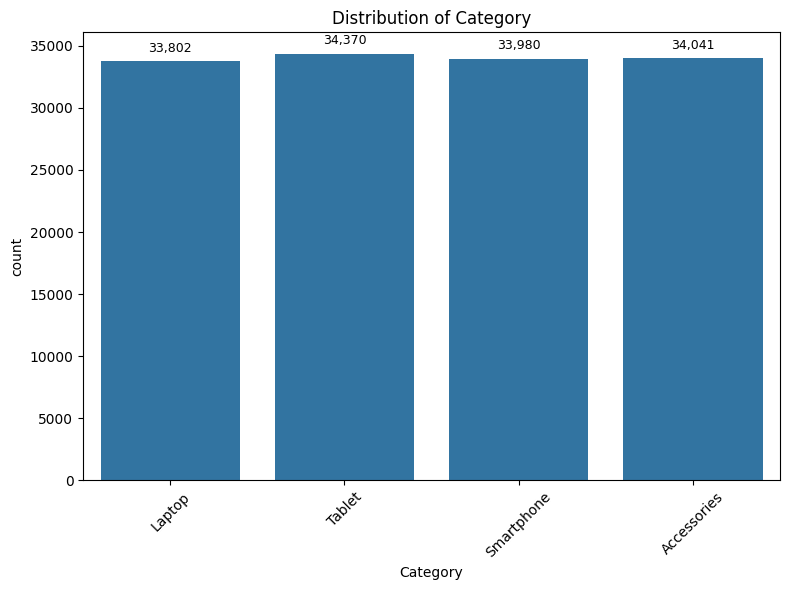

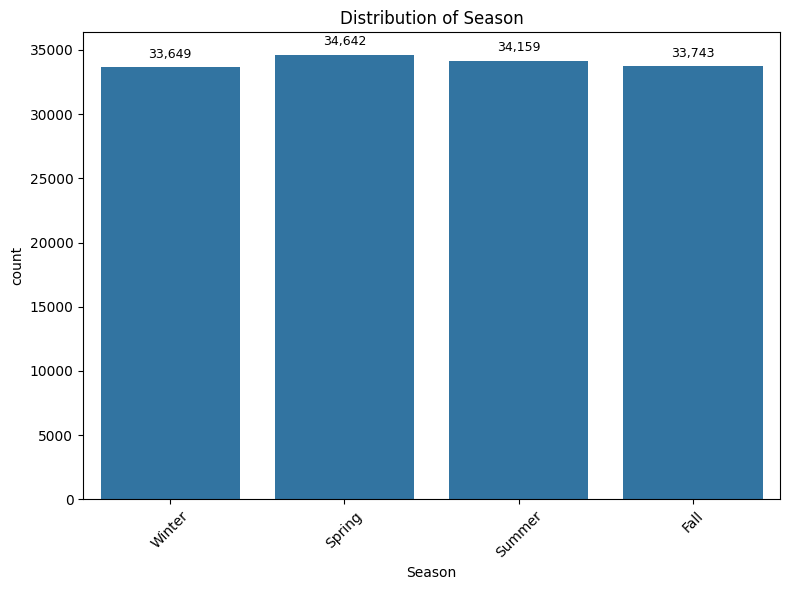

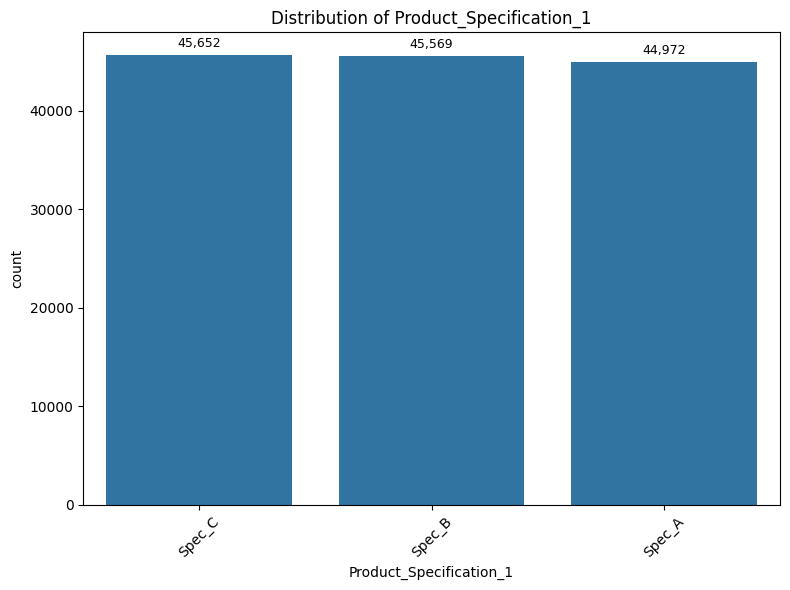

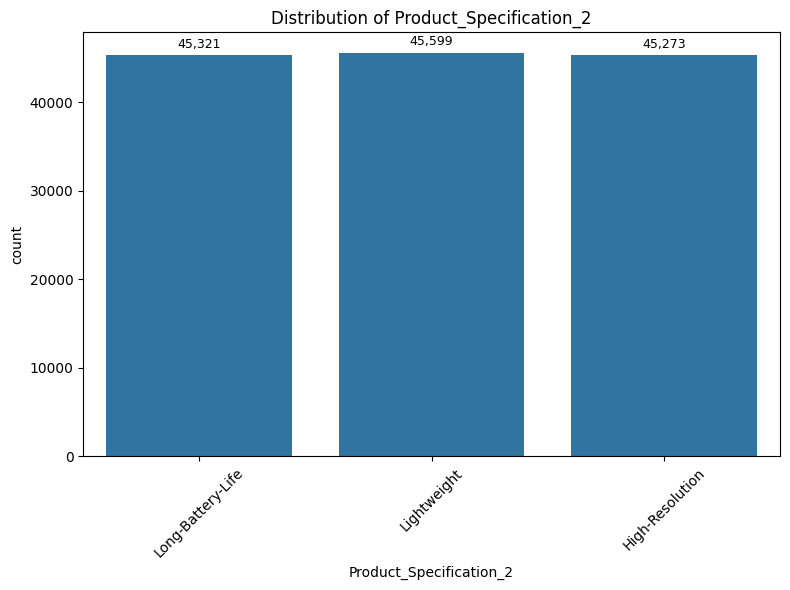

In [13]:
for col in ['Category', 'Season', 'Product_Specification_1', 'Product_Specification_2']:
    plt.figure(figsize=(8, 6))  
    ax = sns.countplot(data=data, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

    # Add count labels above bars
    for p in ax.patches:
        height = p.get_height()
        ax.text(
            p.get_x() + p.get_width() / 2,   # x-position (center of bar)
            height + 500,                   # y-position slightly above bar
            f'{int(height):,}',             # format as integer with commas
            ha='center', va='bottom', fontsize=9
        )

    plt.tight_layout()
    plt.show()


**Correlation Matrix**

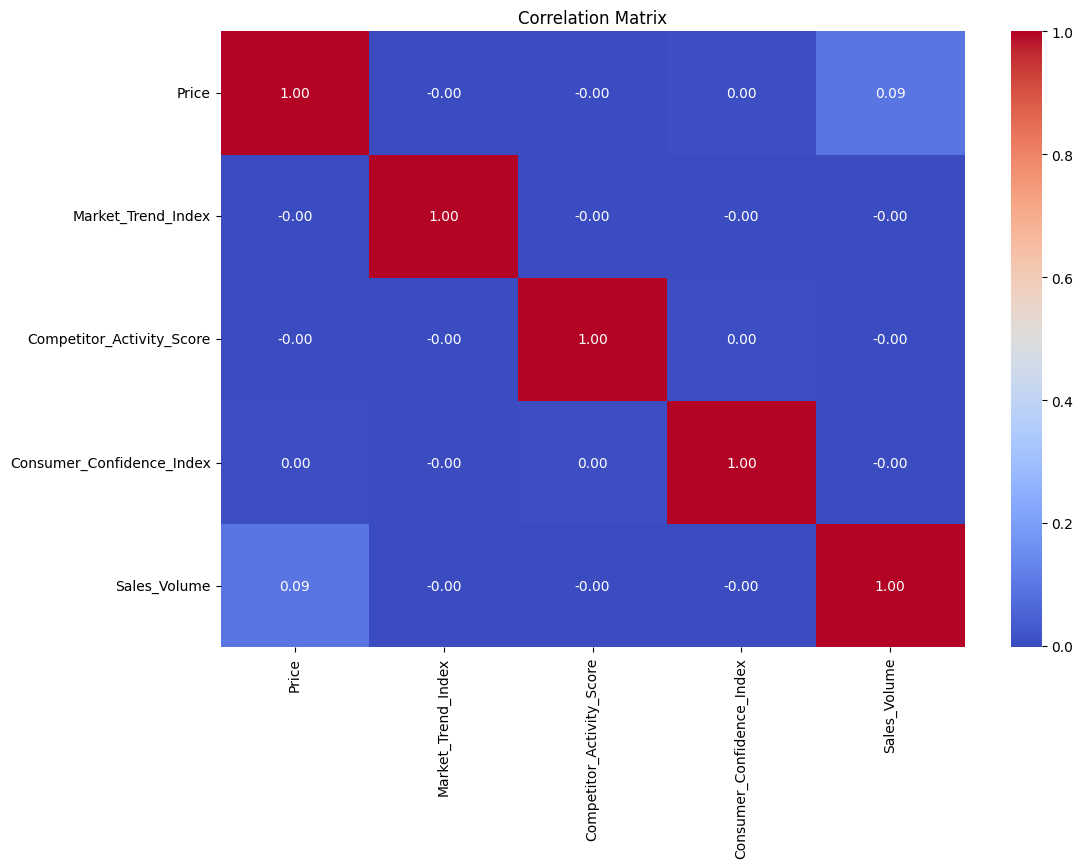

In [14]:
# Correlation Matrix
num_cols = data.select_dtypes(include='number').drop(columns=['Product_ID'])
corr = num_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


**Correlation Matrix Summary**

a. Very weak or no linear correlation exists between most variables.

b. Sales_Volume has a very weak positive correlation with Price (0.09), which indicate a minimal linear relationship.

c. All other features (Market_Trend_Index, Competitor_Activity_Score, Consumer_Confidence_Index) show near zero correlation with Sales_Volume and with each other.

**Conclusion:** This suggests that linear relationships are minimal, and non-linear models may perform better in capturing patterns in the data.

In [15]:
# Save the cleaned data

data.to_csv("cleaned_data.csv", index=False)

**Exploratory Data Analysis 1: Initial Insights**

In [16]:
# Set Date as index for time-based plots 
data.set_index('Date', inplace=True)


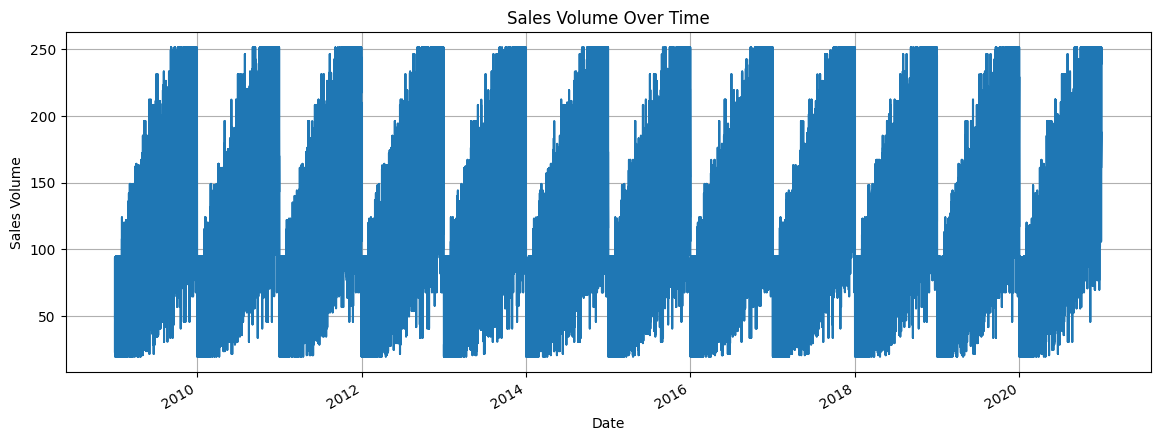

In [17]:
# Sales Trend Over Time
plt.figure(figsize=(14, 5))
data['Sales_Volume'].plot()
plt.title('Sales Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.grid(True)
plt.show()

**Sales Volume Over Time**

a. The plot shows a strong seasonal pattern repeating annually.

b. Sales volume increases steadily within each year, peaking toward year-end.

c. This indicates clear seasonality and a consistent upward intra-year trend and ideal for time-series forecasting.

d. No major long-term trend or structural break is visible across the ~12 years.

e. Suitable for models that capture seasonality and trend, such as SARIMA, Prophet, or Exponential Smoothing.

C:\Users\USER\AppData\Local\Temp\ipykernel_16072\3769722419.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sum = filtered_data.resample('M')['Sales_Volume'].sum().reset_index()
C:\Users\USER\AppData\Local\Temp\ipykernel_16072\3769722419.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_mean = filtered_data.resample('M')['Sales_Volume'].mean().reset_index()


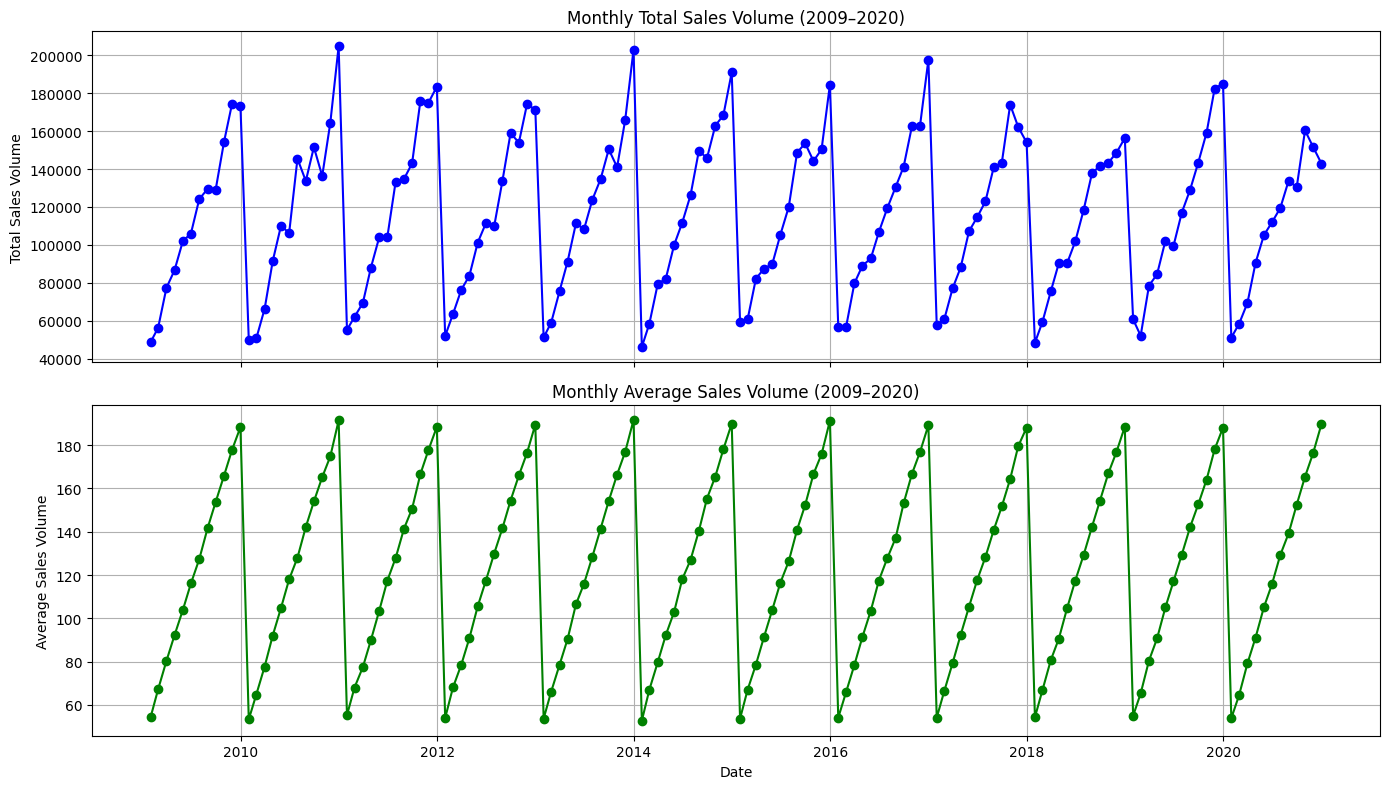

In [29]:
# Monthly Sales Trend from 2009 to 2020
# Resample monthly and compute sum and mean
monthly_sum = filtered_data.resample('M')['Sales_Volume'].sum().reset_index()
monthly_mean = filtered_data.resample('M')['Sales_Volume'].mean().reset_index()

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 8), sharex=True)

# Monthly total sales
axes[0].plot(monthly_sum['Date'], monthly_sum['Sales_Volume'], color='blue', marker='o', linestyle='-')
axes[0].set_title('Monthly Total Sales Volume (2009–2020)')
axes[0].set_ylabel('Total Sales Volume')
axes[0].grid(True)

# Monthly average sales
axes[1].plot(monthly_mean['Date'], monthly_mean['Sales_Volume'], color='green', marker='o', linestyle='-')
axes[1].set_title('Monthly Average Sales Volume (2009–2020)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Average Sales Volume')
axes[1].grid(True)

plt.tight_layout()
plt.show()


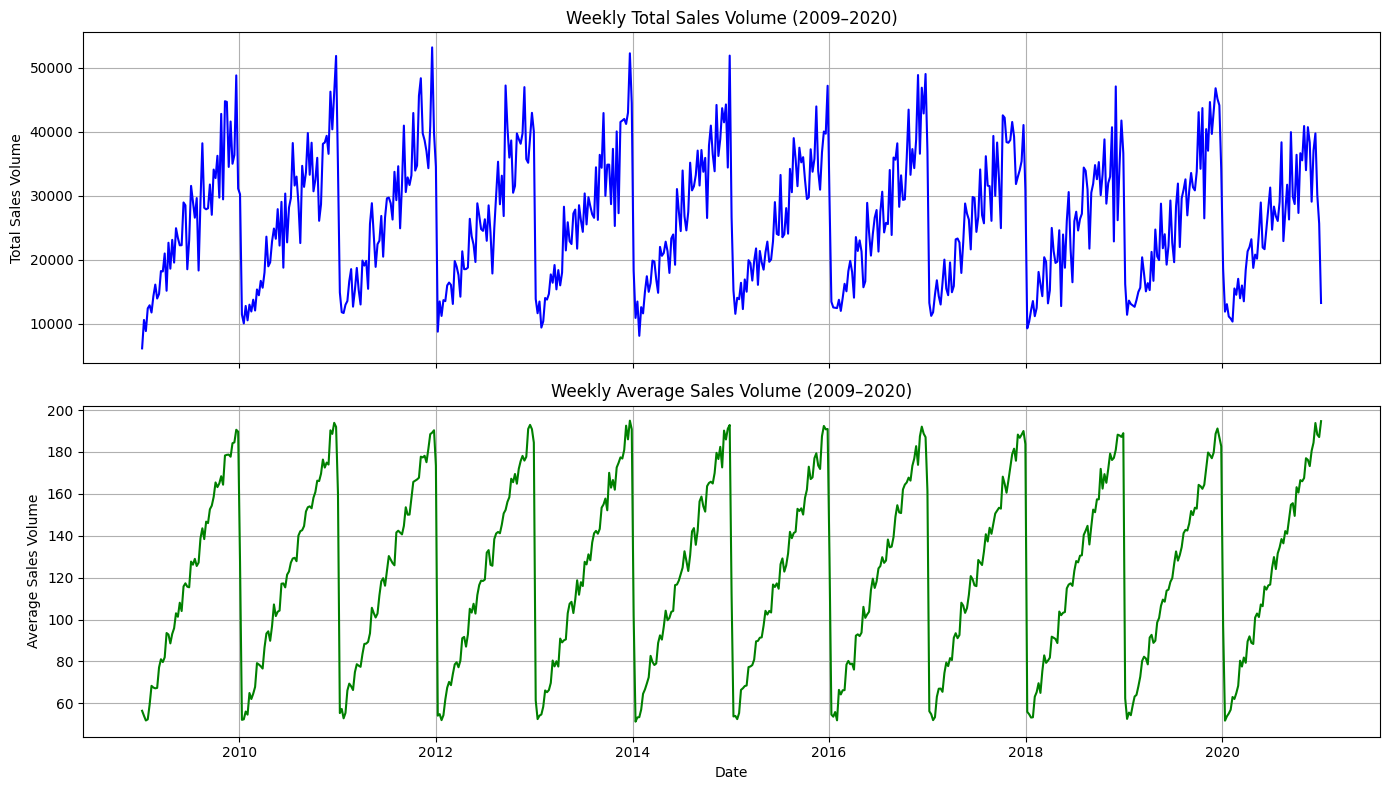

In [28]:
# # Weekly Trend from 2009 to 2020 (Mean and Summ)
# Filter data from 2009 to 2020
filtered_data = data.loc['2009':'2020']

# Resample weekly and compute sum and mean
weekly_sum = filtered_data.resample('W')['Sales_Volume'].sum().reset_index()
weekly_mean = filtered_data.resample('W')['Sales_Volume'].mean().reset_index()

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(14, 8), sharex=True)

# Weekly total sales
axes[0].plot(weekly_sum['Date'], weekly_sum['Sales_Volume'], color='blue')
axes[0].set_title('Weekly Total Sales Volume (2009–2020)')
axes[0].set_ylabel('Total Sales Volume')
axes[0].grid(True)

# Weekly average sales
axes[1].plot(weekly_mean['Date'], weekly_mean['Sales_Volume'], color='green')
axes[1].set_title('Weekly Average Sales Volume (2009–2020)')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Average Sales Volume')
axes[1].grid(True)

plt.tight_layout()
plt.show()


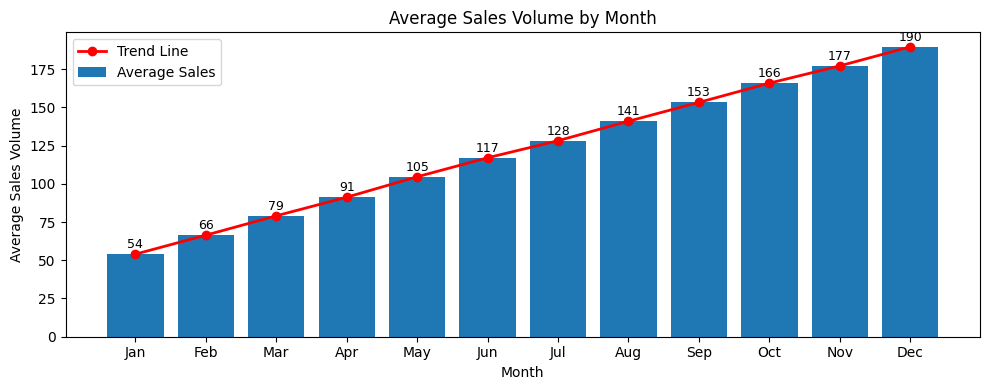

In [ ]:
# Monthly Trends 
# Create new time features
data['Month'] = data.index.month
data['Year'] = data.index.year

# Group by month
monthly_avg = data.groupby('Month')['Sales_Volume'].mean()

# Plot
fig, ax = plt.subplots(figsize=(10, 4))
bars = ax.bar(monthly_avg.index, monthly_avg.values, label='Average Sales')

# Add trend line
ax.plot(monthly_avg.index, monthly_avg.values, color='red', linewidth=2, marker='o', label='Trend Line')

# Add labels on top of bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 2, f'{height:.0f}',
            ha='center', va='bottom', fontsize=9)

# Titles and labels
ax.set_title('Average Sales Volume by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Average Sales Volume')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Add legend
ax.legend()

plt.tight_layout()
plt.show()


**Average Sales Volume by Month**

a. The bar chart shows a clear upward trend in average sales volume from January to December. 

b. Sales start relatively low in the early months and steadily increase, peaking in December with the highest average sales. 

c. This indicates a strong seasonal pattern, likely driven by year-end consumer demand such as holiday shopping or seasonal promotions.

d. The plot is useful insight for seasonal forecasting and inventory planning.

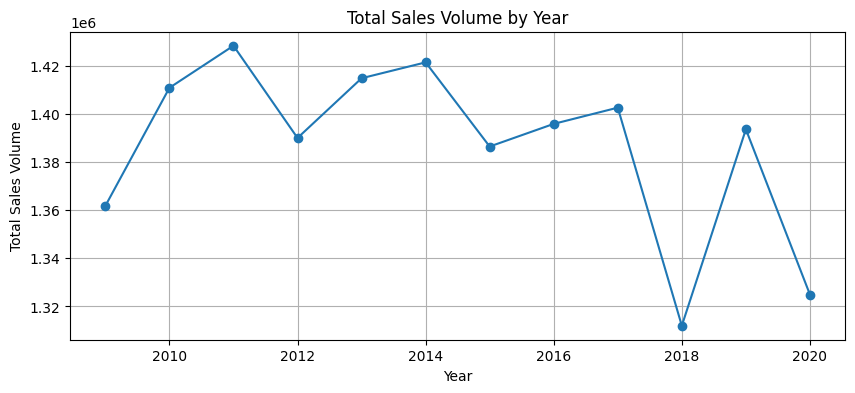

In [ ]:
# Yearly trend
yearly_sum = data.groupby('Year')['Sales_Volume'].sum()

plt.figure(figsize=(10, 4))
yearly_sum.plot(marker='o')
plt.title('Total Sales Volume by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales Volume')
plt.grid(True)
plt.show()


**Total Sales Volume by Year**

a. Sales fluctuates around 1.37 to 1.43 million units annually from 2009 to 2017,

b. A sharp decline occurred in 2018, which marks the lowest total sales volume across the period.

c. Sales recovered in 2019 but dropped again in 2020.

d. These dips may reflect external disruptions (e.g., market shifts, economic events) and warrant further investigation.

e. This insight supports the need for year-over-year analysis and may inform trend adjustments in forecasting models.

<Figure size 1000x500 with 0 Axes>

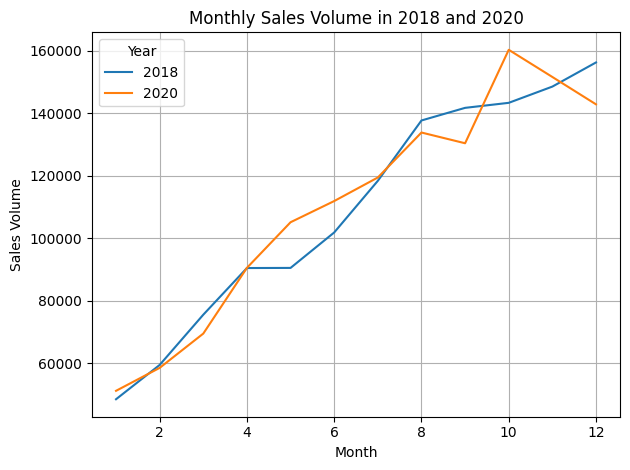

In [ ]:
# Investigation of dip years

# Extract data for dip years
dip_years = data[data.index.year.isin([2018, 2020])]

# Monthly Sales Trends for 2018 and 2020
plt.figure(figsize=(10, 5))
dip_years.groupby([dip_years.index.year, dip_years.index.month])['Sales_Volume'].sum().unstack(0).plot()
plt.title('Monthly Sales Volume in 2018 and 2020')
plt.xlabel('Month')
plt.ylabel('Sales Volume')
plt.legend(title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()


**Monthly Sales Volume in 2018 and 2020**

a. Both years follow a similar seasonal growth pattern, with sales rising through the year.

b. The dip in total annual sales in both years likely stems from lower early-year sales in 2018 and a sharp drop in December 2020, despite strong October performance

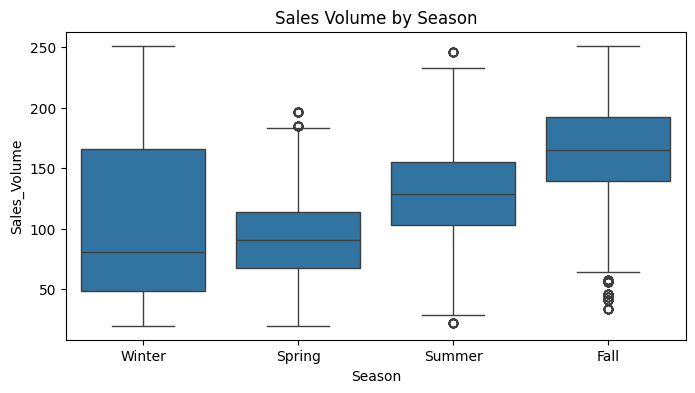

In [ ]:
# Seasonality Analysis
plt.figure(figsize=(8, 4))
sns.boxplot(data=data, x='Season', y='Sales_Volume')
plt.title('Sales Volume by Season')
plt.show()


**Sales Volume by Season**

a. Fall and Winter show the highest variation and highest sales volumes.

b. Fall has the highest median sales, which is an indicator of strong performance leading into the end of the year.

c. Spring and Summer have lower medians and narrower ranges, suggesting stable and moderate sales.

d. Winter shows both high outliers and low baseline sales, which reflects  possible spikes during holidays (e.g., December).

e. Since Fall and Winter are typically the highest-performing seasons, a dip in annual sales of 2018 and 2020 may indicate that these critical periods underperformed compared to other years, even if their absolute values remain higher than other seasons

f. The monitoring of seasonal patterns is critical for forecasting and promotional planning.

C:\Users\USER\AppData\Local\Temp\ipykernel_9948\1747657755.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fall_winter_filtered['Year'] = fall_winter_filtered.index.year
C:\Users\USER\AppData\Local\Temp\ipykernel_9948\1747657755.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fall_winter_filtered, x='Year', y='Sales_Volume', estimator='sum', palette='Blues_d')


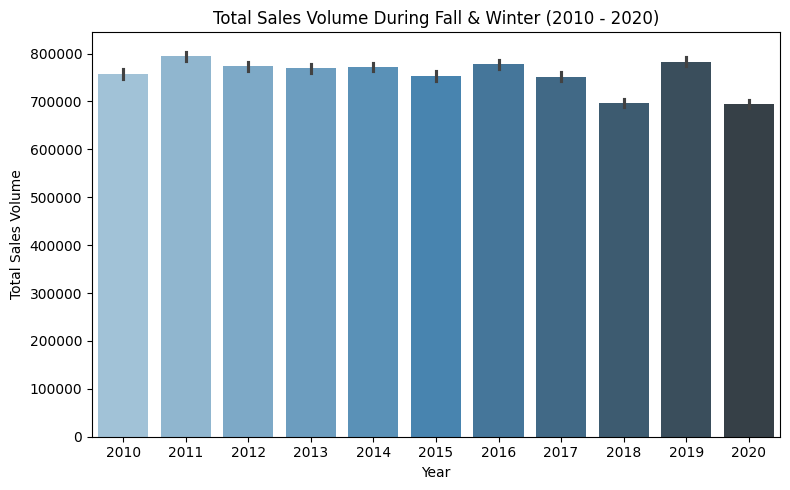

In [ ]:
# Seasonal Comparison for Fall and Winter seasons

# Focus on Fall and Winter seasons only
fall_winter_data = data[data['Season'].isin(['Fall', 'Winter'])]

# Choose years to compare
years_to_compare = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]

# Filter data for selected years
fall_winter_filtered = fall_winter_data[fall_winter_data.index.year.isin(years_to_compare)]

# Add Year column for grouping
fall_winter_filtered['Year'] = fall_winter_filtered.index.year

# Group and Plot Total Sales Volume
plt.figure(figsize=(8, 5))
sns.barplot(data=fall_winter_filtered, x='Year', y='Sales_Volume', estimator='sum', palette='Blues_d')

plt.title('Total Sales Volume During Fall & Winter (2010 - 2020)')
plt.ylabel('Total Sales Volume')
plt.xlabel('Year')
plt.tight_layout()
plt.show()


**Total Sales Volume During Fall & Winter (2010–2020)**

a. 2018 and 2020 clearly show the lowest total sales volumes during Fall and Winter, which confirmed the suspected underperformance.

b. Most other years (especially 2011, 2016, and 2019) had consistently higher sales, maintaining around 770K–800K+ units.

c. The sharp dip in 2018 supports earlier findings about the overall annual decline that year.

d. 2020's low volume may be linked to external disruptions e.g., pandemic impact, and supply chain issues.

e.  Since Fall and Winter are usually the peak seasons, underperformance in these periods significantly impacts total yearly sales. This confirms that the annual dips in 2018 and 2020 are largely due to weaker sales in Q4/Q1

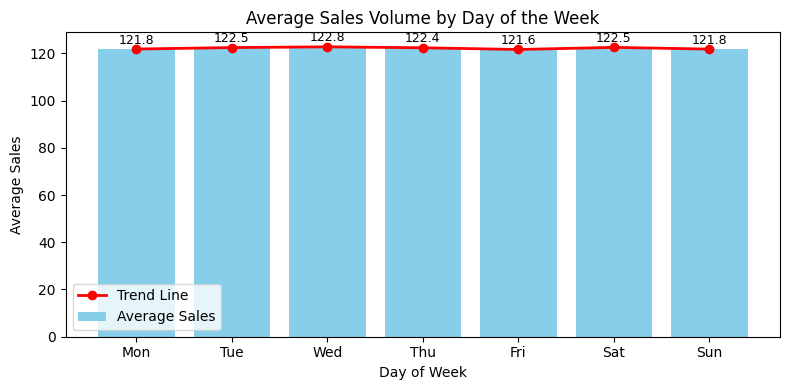

In [ ]:
# Weekly Seasonality 
data['DayOfWeek'] = data.index.dayofweek  # Monday=0, Sunday=6
weekday_avg = data.groupby('DayOfWeek')['Sales_Volume'].mean()

# Map day numbers to names
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
bars = ax.bar(weekday_avg.index, weekday_avg.values, color='skyblue', label='Average Sales')

# Add trend line
ax.plot(weekday_avg.index, weekday_avg.values, color='red', linewidth=2, marker='o', label='Trend Line')

# Set labels and title
ax.set_title('Average Sales Volume by Day of the Week')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Average Sales')
ax.set_xticks(range(7))
ax.set_xticklabels(day_labels, rotation=0)

# Add value labels on top of bars
for i, value in enumerate(weekday_avg):
    ax.text(i, value + 1, f'{value:.1f}', ha='center', va='bottom', fontsize=9)

# Add legend
ax.legend()

plt.tight_layout()
plt.show()


**Average Sales Volume by Day of the Week**

a. Sales volume is consistent across all days (Monday to Sunday).

b. There is no significant variation in average sales between weekdays and weekends.

c. This suggests that day of the week does not influence customer purchasing behavior for this product set.

d. Sales are likely driven more by seasonality, promotions, or product features, rather than daily consumer habits.

e. There is no need to engineer "day-of-week" as a strong feature in time-series or predictive models.

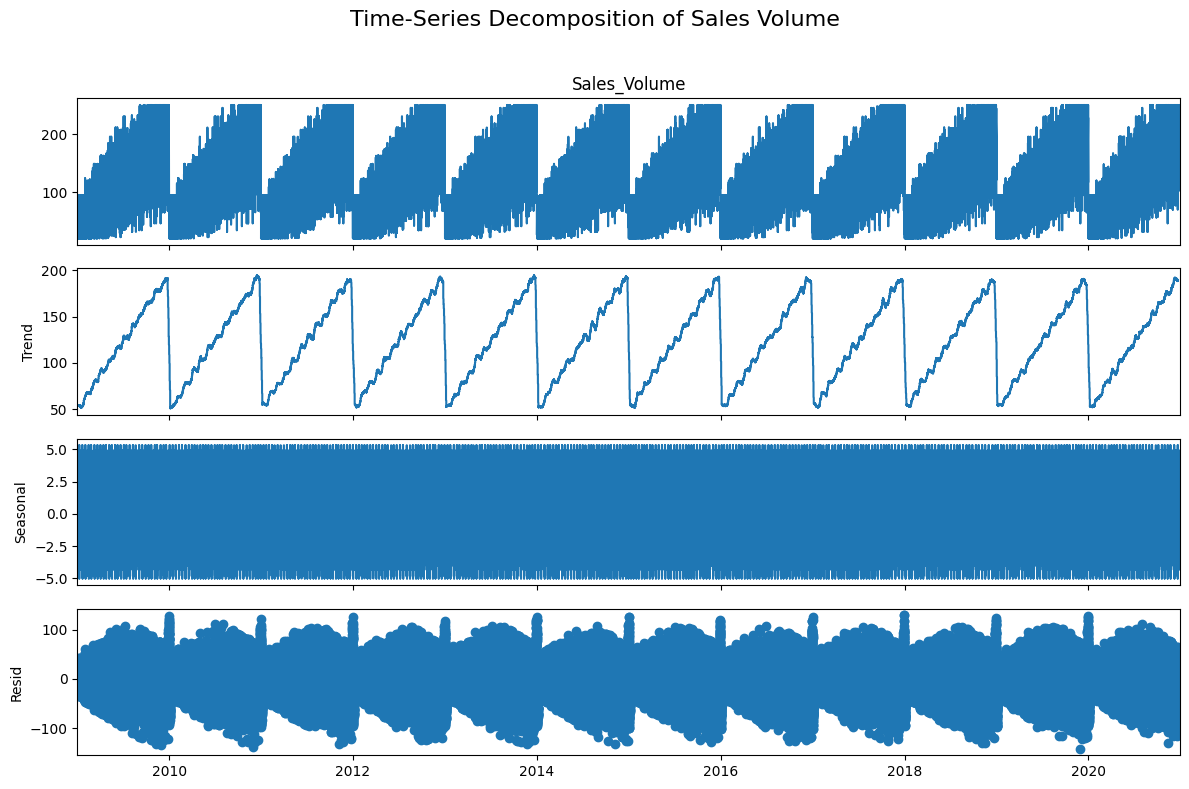

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose time series (assuming daily data, period=365)
result = seasonal_decompose(data['Sales_Volume'], model='additive', period=365)

# Plot decomposition and fix spacing
fig = result.plot()
fig.set_size_inches(12, 8)  # Adjust the size to fill more space

# Set title with proper space
fig.suptitle('Time-Series Decomposition of Sales Volume', fontsize=16)
fig.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for title
plt.show()


**Time-Series Decomposition of Sales Volume**

This decomposition breaks down the Sales_Volume into three key components:

a Trend: It shows a strong upward movement over time, peaking annually. This indicates consistent yearly growth in sales volume.

b. Seasonality: It repeats in a regular cycle (ikely yearly). The seasonal impact is moderate and stable over time (e.g., holidays or end-of-year effects).

c. Residual (Noise): It captures random fluctuations not explained by trend or seasonality.It appears fairly stable without major structural change, which is good for modeling.

d. Sales volume is driven by clear trends and seasonality, making it well-suited for time-series forecasting models like ARIMA, SARIMA, or Prophet. The minimal unexplained noise suggests the data is predictable and reliable.

**Exploratory Data Analysis (EDA) 2- Deep Dive**

C:\Users\USER\AppData\Local\Temp\ipykernel_9948\2549851822.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
C:\Users\USER\AppData\Local\Temp\ipykernel_9948\2549851822.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)


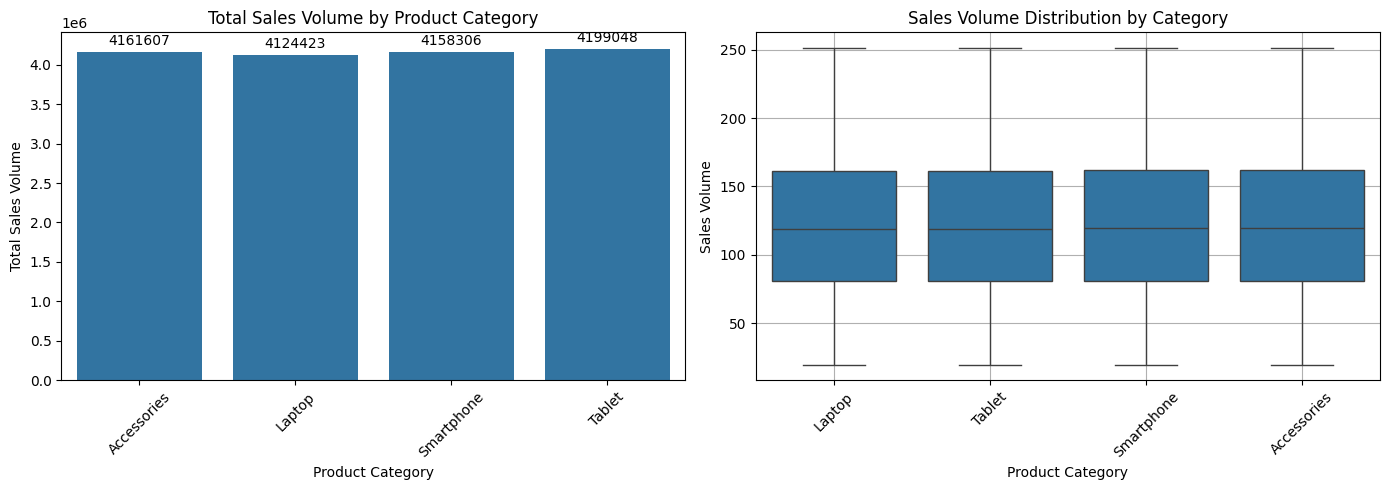

In [ ]:
# Category Performance as Customer Preference
# Prepare data
category_sales = data.groupby('Category')['Sales_Volume'].sum().reset_index()

# Set up subplot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

# Subplot 1: Total Sales Volume (Barplot) ---
ax1 = sns.barplot(data=category_sales, x='Category', y='Sales_Volume', ax=axes[0])
ax1.set_title('Total Sales Volume by Product Category')
ax1.set_xlabel('Product Category')
ax1.set_ylabel('Total Sales Volume')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

# Add bar labels
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.0f', label_type='edge', padding=3)

# Subplot 2: Sales Volume Distribution (Boxplot) ---
ax2 = sns.boxplot(data=data, x='Category', y='Sales_Volume', ax=axes[1])
ax2.set_title('Sales Volume Distribution by Category')
ax2.set_xlabel('Product Category')
ax2.set_ylabel('Sales Volume')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)
ax2.grid(True)

# Layout adjustment
plt.tight_layout()
plt.show()


**Category Performance as Customer Preference**

a. The bar chart shows total sales volume by product category with all categories having similar sales volumes

b. Tablet has the highest total sales (~4.2 million units), which indicate strong customer demand.

c. Laptop has the lowest total sales (~4.1 million), but not significantly behind.

d. Accessories and Smartphones are nearly tied in total volume (~4.16 million).

e. The Sales volume distribution by cateogry reveals the distribution of daily sales volume across categories. All categories exhibit similar median sales and range, with comparable variability and presence of outliers

**Conclusion:** While total sales perform comparably across product categories, the consistency and daily performance (as seen in the box plots) are also quite similar. This suggests a relatively balanced product demand, with Tablets taking slight lead. This suggest a marginal customer preference, or higher movement rate (product performance) in this category.

C:\Users\USER\AppData\Local\Temp\ipykernel_9948\2735144658.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(['Price_Bin', 'Category'])['Sales_Volume'].mean().reset_index()


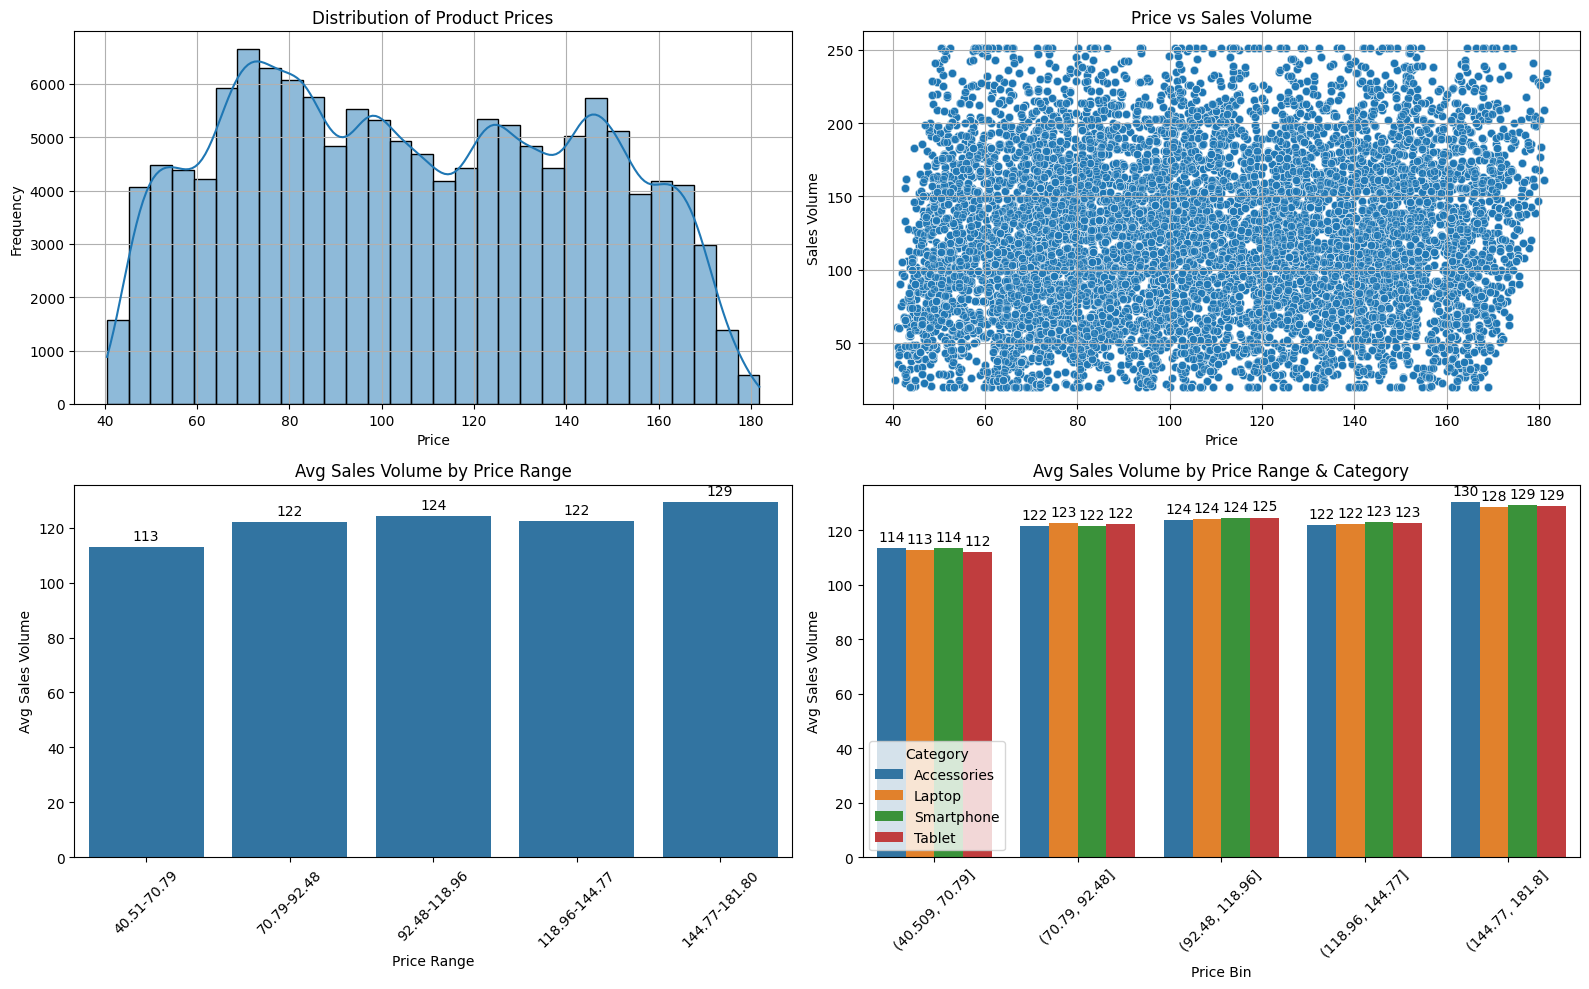

In [ ]:
#  Price Analysis and Impact on Sales Volume
# --- Step 1: Bin prices and label ---
data['Price_Bin'] = pd.qcut(data['Price'], q=5)
bin_labels = [f"{interval.left:.2f}-{interval.right:.2f}" for interval in data['Price_Bin']]
data['Price_Bin_Label'] = bin_labels

# --- Step 2a: Avg Sales by Price Bin ---
price_bin_sales = data.groupby('Price_Bin_Label')['Sales_Volume'].mean().reset_index()
unique_bins = list(dict.fromkeys(bin_labels))
price_bin_sales['Price_Bin_Label'] = pd.Categorical(
    price_bin_sales['Price_Bin_Label'],
    categories=sorted(unique_bins, key=lambda x: float(x.split("-")[0])),
    ordered=True
)
price_bin_sales = price_bin_sales.sort_values('Price_Bin_Label')

# --- Step 2b: Avg Sales by Price Bin & Category ---
grouped = data.groupby(['Price_Bin', 'Category'])['Sales_Volume'].mean().reset_index()

# --- Step 3: Plot All as Subplots (2 rows × 2 columns) ---
fig, axs = plt.subplots(2, 2, figsize=(16, 10))  

# Subplot 1: Histogram of Product Prices
sns.histplot(data['Price'], bins=30, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Product Prices')
axs[0, 0].set_xlabel('Price')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].grid(True)

# Subplot 2: Scatterplot of Price vs Sales Volume
sns.scatterplot(data=data, x='Price', y='Sales_Volume', alpha=0.5, ax=axs[0, 1])
axs[0, 1].set_title('Price vs Sales Volume')
axs[0, 1].set_xlabel('Price')
axs[0, 1].set_ylabel('Sales Volume')
axs[0, 1].grid(True)

# Subplot 3: Bar Plot of Avg Sales by Price Range
sns.barplot(data=price_bin_sales, x='Price_Bin_Label', y='Sales_Volume', ax=axs[1, 0])
axs[1, 0].set_title('Avg Sales Volume by Price Range')
axs[1, 0].set_xlabel('Price Range')
axs[1, 0].set_ylabel('Avg Sales Volume')
axs[1, 0].tick_params(axis='x', rotation=45)
for container in axs[1, 0].containers:
    axs[1, 0].bar_label(container, fmt='%.0f', label_type='edge', padding=3)

# Subplot 4: Bar Plot of Avg Sales by Price Range and Category
sns.barplot(data=grouped, x='Price_Bin', y='Sales_Volume', hue='Category', ax=axs[1, 1])
axs[1, 1].set_title('Avg Sales Volume by Price Range & Category')
axs[1, 1].set_xlabel('Price Bin')
axs[1, 1].set_ylabel('Avg Sales Volume')
axs[1, 1].tick_params(axis='x', rotation=45)
axs[1, 1].legend(title='Category')
for container in axs[1, 1].containers:
    axs[1, 1].bar_label(container, fmt='%.0f', label_type='edge', padding=3)

plt.tight_layout()
plt.show()



**Price Analysis and Its Impact on Sales Volume**

1. Distribution of Product Prices: 

a. Most product prices cluster between 60 and 160 units.

b. The distribution is roughly uniform with mild peaks, suggesting a wide but evenly priced product range.

c. Kernel Density Estimation curve shows multiple small peaks, indicating some favored pricing points.

2. Price vs Sales Volume (Scatter Plot)

a. No strong visible correlation between price and sales volume.

b. Sales volume appears widely dispersed across all price levels.

c. This suggests that price alone may not be a major driver of customer purchasing behavior.

3. Average Sales Volume by Price Range

a. Average sales volume increases slightly with higher price ranges.

b. The highest sales volume is observed in the most expensive price tier (144.77–181.80).

c. Contrasts the common assumption that lower prices drive more volume.

4. Average Sales Volume by Price Range and Category

a. Average sales volume increases with higher price ranges, which is contrary to common low-price-high-volume assumptions.

b. All product categories (Accessories, Laptop, Smartphone, Tablet) show similar increasing trends.

c. Price range (144.77–181.8) yields the highest average sales (~129–130) across all categories.

d. Lowest sales volumes (~112–114) are observed in the lowest price range (40.50–70.79).

e. Tablets slightly underperform in the lowest price range.

f. Minimal variation in sales volume within each price bin across categories 

**Conclusion:** Despite the traditional expectation that lower prices drive higher sales, these plots reveal a positive correlation between price and sales volume in this dataset. Higher-priced products tend to have higher average sales volumes, both overall and across product categories. This suggests customers may perceive value or quality with higher prices, and premium pricing does not hinder demand. Therefore, pricing strategies should consider value-based or premium positioning rather than aggressive discounting.

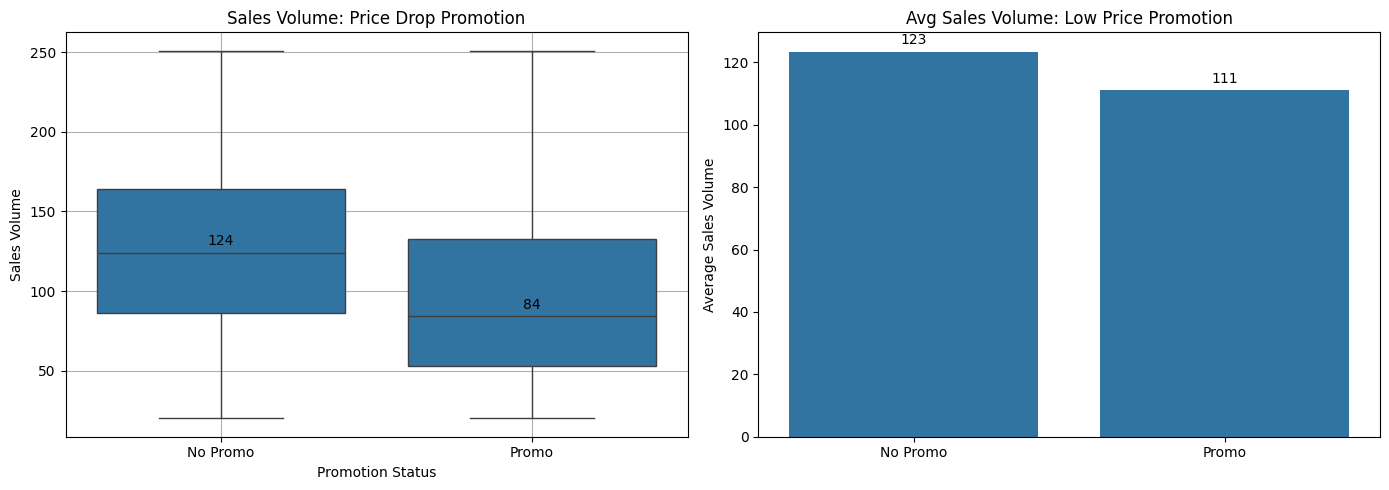

In [ ]:
# Sales Volume Impact Analysis Based on Promotion Detection Methods
# Step 1: Detect promotion by price drop 
data_sorted = data.sort_values(['Product_ID', 'Date'])
data_sorted['Price_Change'] = data_sorted.groupby('Product_ID')['Price'].diff()
data_sorted['Is_Promotion_Drop'] = data_sorted['Price_Change'] < 0

# Step 2: Detect promotion by unusually low price (10th percentile) ---
promo_threshold = data['Price'].quantile(0.10)
data['Is_Promotion_Low'] = (data['Price'] < promo_threshold).astype(int)

# Step 3: Group for barplot ---
promo_sales = data.groupby('Is_Promotion_Low')['Sales_Volume'].mean().reset_index()

# Step 4: Create Subplots ---
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Subplot 1: Boxplot (Price Drop)
sns.boxplot(data=data_sorted, x='Is_Promotion_Drop', y='Sales_Volume', ax=axs[0])
axs[0].set_title('Sales Volume: Price Drop Promotion')
axs[0].set_xlabel('Promotion Status')
axs[0].set_ylabel('Sales Volume')
axs[0].set_xticks([0, 1])
axs[0].set_xticklabels(['No Promo', 'Promo'])
axs[0].grid(True)

# Add median labels on top of each box
medians = data_sorted.groupby('Is_Promotion_Drop')['Sales_Volume'].median()
for i, median in enumerate(medians):
    axs[0].text(i, median + 5, f"{median:.0f}", ha='center', fontsize=10, color='black')

# Subplot 2: Barplot (Low Price Promotion)
ax2 = sns.barplot(data=promo_sales, x='Is_Promotion_Low', y='Sales_Volume', ax=axs[1])
axs[1].set_title('Avg Sales Volume: Low Price Promotion')
axs[1].set_xlabel('')
axs[1].set_ylabel('Average Sales Volume')
axs[1].set_xticks([0, 1])
axs[1].set_xticklabels(['No Promo', 'Promo'])

# Add labels on bars
for container in ax2.containers:
    ax2.bar_label(container, fmt="%.0f", padding=3)

plt.tight_layout()
plt.show()


**Assumptions:**

a. Promotions are inferred indirectly using dynamic and static method as there is no explicit "Promotion" column.

b. Dynamic price drops is used for comparison of present to previous price for the same product while the static method use unusually low prices (below the 10th percentile of all prices) for determining promotion and non-promotion

c. The analysis treats "price drop" and "low price" promotions independently in two subplots.

d.  Product_ID and Date are used for product and date sorting using necessary to correctly calculate price differences.


**Findings from the Plots:**

a. Price Drop Promotions Method: Non-promotion periods have higher average sales volume (≈ 124 units) than periods following a price drop (≈ 84 units). This indicates price drops might not boost sales and may even be associated with declining interest or stock clearance.

b. Low Price Promotions Method: Average sales volume is again higher during non-promotion periods (124 vs. 111), which suggests that setting a price below the 10th percentile does not improve sales volume on average.

**Conclusion:** The analysis indicates that neither price drops nor low-price promotion method lead to higher average sales volumes. This challenges the common assumption that lower prices always drive sales and suggests that promotion strategies may need to be re-evaluated or better targeted.

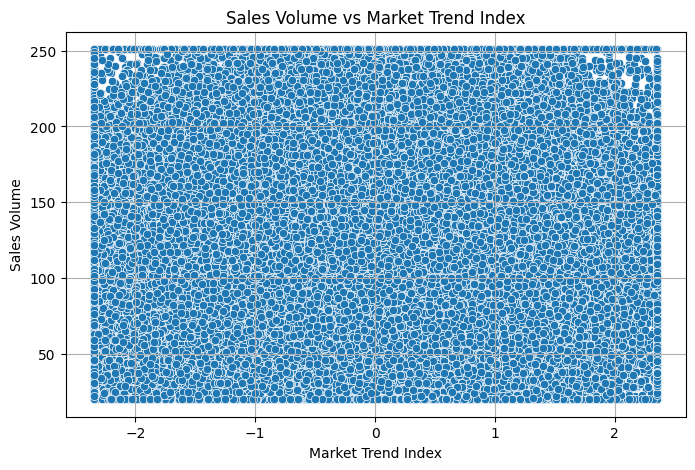

In [ ]:
# Sales Volume vs Market Trend Index
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='Market_Trend_Index', y='Sales_Volume')
plt.title('Sales Volume vs Market Trend Index')
plt.xlabel('Market Trend Index')
plt.ylabel('Sales Volume')
plt.grid(True)
plt.show()


Sales Volume vs. Market Trend Index 

a. The data points are densely scattered across the entire x-axis, without a clear upward or downward pattern.

b. Sales volume appears randomly distributed, regardless of whether the market trend is negative, neutral, or positive.

c. There is no obvious linear or non-linear correlation visible to the eye.

**Conclusion:** Based on the plot, there is no strong visual relationship between sales volume and the market trend index. This suggests that market trend fluctuations may not directly influence individual product sales or the impact may be subtle 

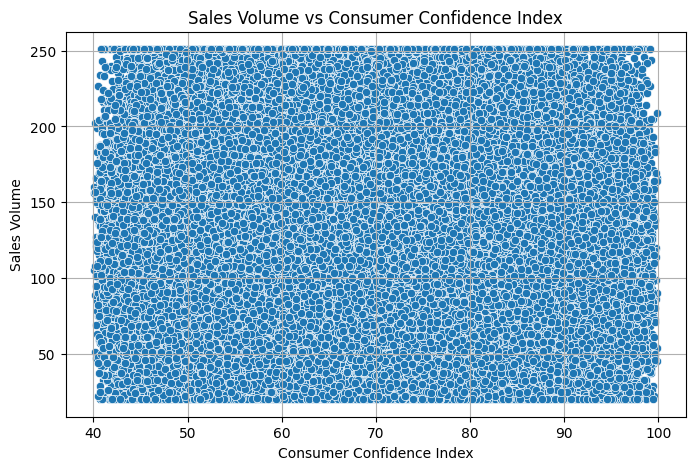

In [ ]:
# Customer Sentiment Proxy: Consumer Confidence Index vs Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='Consumer_Confidence_Index', y='Sales_Volume')
plt.title('Sales Volume vs Consumer Confidence Index')
plt.xlabel('Consumer Confidence Index')
plt.ylabel('Sales Volume')
plt.grid(True)
plt.show()


**Consumer Sentiment**

a. The points are densely scattered across all CCI values (40 to 100).

b. No strong upward or downward trend is visually present.

c. Sales volume is widely spread across all levels of consumer confidence.

d. The distribution appears random, suggesting a very weak or no correlation.

**Conclusion:** There appears to be no clear visual relationship between Consumer Confidence Index and Sales Volume. The fluctuations in consumer confidence (a proxy for customer sentiment) do not significantly impact product sales in this dataset. This suggests that consumer sentiment, as measured by confidence levels, may not be a strong driver of purchasing behavior in this particular context.

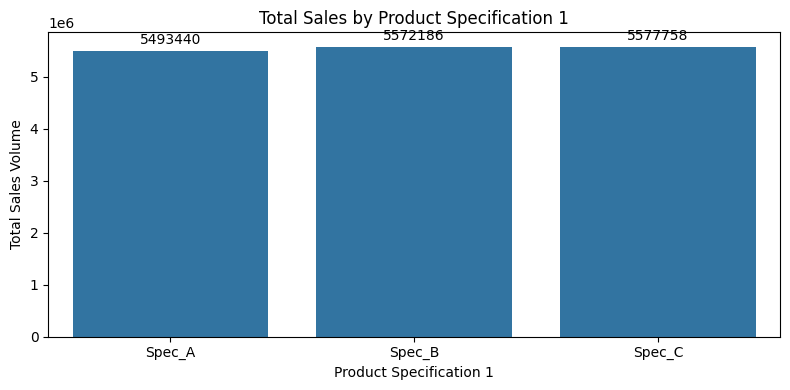

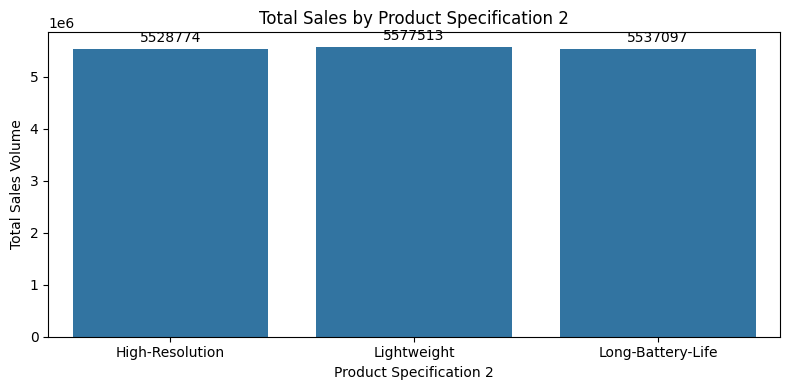

In [ ]:
# Product Preferences = Behavioral Indicator

# Grouping data
spec1_perf = data.groupby('Product_Specification_1')['Sales_Volume'].sum().reset_index()
spec2_perf = data.groupby('Product_Specification_2')['Sales_Volume'].sum().reset_index()

# --- Plot for Specification 1 ---
plt.figure(figsize=(8,4))
ax1 = sns.barplot(data=spec1_perf, x='Product_Specification_1', y='Sales_Volume')
plt.title('Total Sales by Product Specification 1')
plt.xlabel('Product Specification 1')
plt.ylabel('Total Sales Volume')

# Add labels
for container in ax1.containers:
    ax1.bar_label(container, fmt='%.0f', padding=3)

plt.tight_layout()
plt.show()

# --- Plot for Specification 2 ---
plt.figure(figsize=(8,4))
ax2 = sns.barplot(data=spec2_perf, x='Product_Specification_2', y='Sales_Volume')
plt.title('Total Sales by Product Specification 2')
plt.xlabel('Product Specification 2')
plt.ylabel('Total Sales Volume')

# Add labels
for container in ax2.containers:
    ax2.bar_label(container, fmt='%.0f', padding=3)

plt.tight_layout()
plt.show()


**Total Sales by Product Specifications**

a. Product Specification 1: Spec_C leads with the highest total sales (~5.58 million). Spec_B follows closely (~5.58 million) with marginal difference while Spec_A has the lowest total (~5.50 million). Although not significantly behind.

b. Product Specification 2: Lightweight products had the highest total sales (~5.58 million), which suggest portability is valued. 
Long-Battery-Life is next (~5.54 million) and is slightly above High-Resolution (~5.53 million). All three feature preferences are nearly equally popular, but Lightweight edges out others slightly.

c. Customer preferences are balanced across different product specs, and this indicate diverse needs.

d. The slight edge for Spec_C and Lightweight suggests a preference for specific design or usability traits.

e. These trends may inform targeted marketing or product bundling strategies.

**General Insights**

**Seasonality & Temporal Patterns**

a. Strong Monthly Seasonality: Sales volume steadily increases from January to December, peaking in Q4, especially in December, indicating strong end-of-year demand—likely driven by holidays and seasonal shopping behavior.

b. Seasonal Sales Strength: Fall and Winter consistently outperform other seasons in sales volume, both on average and in total, making them strategic windows for campaigns and stock planning.

c. Weekly Stability: Average sales volume is remarkably consistent across all days of the week, indicating minimal weekday effects and steady consumer demand throughout the week.

d. Yearly Fluctuation: While sales fluctuate year to year, there’s no strong long-term upward or downward trend, with total yearly sales staying relatively stable around 1.35–1.42M. Exceptions like 2018 (low) and 2011 (high) may reflect market or operational anomalies.

e. Monthly Breakdown of Specific Years: In both 2018 and 2020, monthly sales volumes exhibit the same strong upward slope, reinforcing the need for month-level granularity in forecasting models.

f. Time-Series Decomposition confirms the presence of consistent trend and strong seasonal components, validating the use of seasonal time-series forecasting techniques.

**External Indices Impact**

a. Market Trend Index & Consumer Confidence Index show no visible relationship with Sales Volume. The scatter plots suggest these external economic indicators do not significantly influence daily sales, and may be safely excluded or deprioritized as predictive features.

**Final Conclusion**

a. Sales performance is primarily driven by intrinsic product and temporal factors rather than external indices or promotions. Specifically:

b. Price has a positive association with sales volume, suggesting premium pricing aligns with perceived value or quality.

c. Promotions do not increase sales; they may even reduce perceived value, leading to lower average sales.

d. Product specifications and categories perform similarly, so marketing or inventory efforts should not overly favour one over another.

e. Seasonality is the most dominant pattern: Sales peak in Fall/Winter and grow steadily throughout the year. Thus, marketing, inventory, and forecasting should prioritize seasonal patterns.

f. Time-series modeling with seasonality is essential for accurate forecasting.

g. External indices (e.g., Market Trends, Confidence Index) show no strong predictive signal and can be excluded from modeling unless further evidence suggests otherwise.

h. The strategic focus must include resources shift toward optimizing seasonal sales strategies, premium pricing, and steady product quality—rather than promotions or relying on macroeconomic trends.